<center><h1>Python Pandas Tutorial</h1><center>

## Pandas is Python Data Analysis Library

pandas is an open source, BSD-licensed(can use for commercial means) library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

* Widely used
* Open Source
* Active Development
* Great Documentation

Home Page: http://pandas.pydata.org/

Using Documentation from: http://pandas.pydata.org/pandas-docs/stable/

Fantastic Cheat Sheet: http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Best book by Panda's creator Wes Kinney (2nd Edition 2017): http://shop.oreilly.com/product/0636920050896.do

In [3]:
import pandas as pd

In [4]:
#pd.reset_option('display.max_rows')
pd.options.display.max_rows = 40

In [5]:
# Pandas is a big package took a while...

In [6]:
import numpy as np # another big library with various numeric functions

In [7]:
import matplotlib.pyplot as plt

# Panda's two fundamental data structures: Series and DataFrame.

### Series
A Series is a one-dimensional array-like object containing a sequence of values (
similar types to NumPy types) and an associated array of data labels - index.
Simplest Series is from an array of data.

In [8]:
# Let's create some Series!

In [9]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [10]:
s+4

0    5.0
1    8.0
2    7.5
3    7.0
4    NaN
5    4.0
6   -1.0
dtype: float64

In [11]:
# NaN = Not a Number (used for missing numerical values)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [12]:
s2 = s * 4 
s2

0     4.0
1    16.0
2    14.0
3    12.0
4     NaN
5     0.0
6   -20.0
dtype: float64

In [13]:
s2**2

0     16.0
1    256.0
2    196.0
3    144.0
4      NaN
5      0.0
6    400.0
dtype: float64

In [14]:
### Often you want Series with an index identifying each data point with a label 

In [15]:
labeledSeries = pd.Series([24, 77, -35, 31], index=['d', 'e', 'a', 'g'])
labeledSeries

d    24
e    77
a   -35
g    31
dtype: int64

In [16]:
## A  bit similar to dictionary isn't it?


In [17]:
labeledSeries['g']

31

In [18]:
labeledSeries.index

Index(['d', 'e', 'a', 'g'], dtype='object')

In [19]:
labeledSeries.values

array([ 24,  77, -35,  31])

In [20]:
labeledSeries[['a','d']] # NOTE double list brackets!!

a   -35
d    24
dtype: int64

In [21]:
# select values via a boolean array
labeledSeries[labeledSeries > 30]

e    77
g    31
dtype: int64

In [22]:
# So Series behaves like a fixed-length, ordered dictionary with extra helper methods

In [23]:
'd' in labeledSeries

True

### Can create series from dictionary by simply passing to constructor pd.Series(mydict)

In [24]:
citydict = {'Riga': 650000, 'Tukums':20000, 'Ogre': 25000, 'Carnikava': 3000}
citydict

{'Riga': 650000, 'Tukums': 20000, 'Ogre': 25000, 'Carnikava': 3000}

In [25]:
cseries = pd.Series(citydict)
cseries

Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
dtype: int64

In [26]:
## Overwriting default index
clist = ['Jurmala', 'Riga', 'Tukums', 'Ogre', 'Daugavpils']
cseries2 = pd.Series(citydict, index = clist)
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [27]:
# notice Carnikava was lost, since our index did not have it!
# and order was preserved from the given index list!

In [28]:
# For missing data
cseries2.isnull()

Jurmala        True
Riga          False
Tukums        False
Ogre          False
Daugavpils     True
dtype: bool

In [29]:
cseries2.dropna()

Riga      650000.0
Tukums     20000.0
Ogre       25000.0
dtype: float64

In [30]:
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [31]:
cseries3 = cseries + cseries2
cseries3

Carnikava           NaN
Daugavpils          NaN
Jurmala             NaN
Ogre            50000.0
Riga          1300000.0
Tukums          40000.0
dtype: float64

In [32]:
# So NaN + number = NaN

In [33]:
cseries.name = "Latvian Cities"
cseries.index.name = "City"
cseries

City
Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
Name: Latvian Cities, dtype: int64

In [34]:
cseries.index

Index(['Riga', 'Tukums', 'Ogre', 'Carnikava'], dtype='object', name='City')

In [35]:
cseries.index = ['CarnikavaIsNotaCity','OgreEatsHumans', 'RigaIsOld', 'TukumsSmukums']
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld               25000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [36]:
# Series values are mutable
cseries['RigaIsOld']=625000
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [37]:
# How to rename individual index elements?
cseries.index[2]='RigaIsOldButFantastic'
cseries

TypeError: Index does not support mutable operations

In [38]:
# We use Renaming method to rename individual elements

In [39]:
cseries.rename(index={'RigaIsOld':'RigaRocks'})

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaRocks              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

### Integer (Position-based) vs Label-based Indexes

Working with pandas objects indexed by integers is something that often trips up
new users due to some differences with indexing semantics on built-in Python data
structures like lists and tuples. For example, you might not expect the following code
to generate an error:



In [40]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [41]:
ser[-1]

KeyError: -1

In this case, pandas could “fall back” on integer indexing, but it’s difficult to do this in
general without introducing subtle bugs. 

Here we have an index containing 0, 1, 2,
but inferring what the user wants (label-based indexing or position-based) is difficult:


In [42]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [43]:
## With a non-integer index there is no potential for ambiguity:

In [44]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [45]:
ser2[::-1]

c    2.0
b    1.0
a    0.0
dtype: float64

In [46]:
## To keep things consistent, if you have an axis index containing integers, data selection
##will always be label-oriented. 

# For more precise handling, use loc (for labels) or iloc (for integers):

In [47]:
ser2.loc['b']

1.0

In [48]:
# Note: label indexing includes the endpoint, integer indexing does not
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [49]:
ser.iloc[:1]

0    0.0
dtype: float64

* loc gets rows (or columns) with particular labels from the index.

* iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

# Date Range creation

Date ranges are used as indexes for time series data:
* https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#time-series

In [50]:
dates = pd.date_range('20180521', periods=15)
dates

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range('20200416', periods=15, freq="W")

DatetimeIndex(['2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10',
               '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
               '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05',
               '2020-07-12', '2020-07-19', '2020-07-26'],
              dtype='datetime64[ns]', freq='W-SUN')

In [52]:
pd.date_range('20200416', periods=7, freq="W-THU")

DatetimeIndex(['2020-04-16', '2020-04-23', '2020-04-30', '2020-05-07',
               '2020-05-14', '2020-05-21', '2020-05-28'],
              dtype='datetime64[ns]', freq='W-THU')

In [53]:
# more on data_range frequency here
# https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

In [54]:
# Datetime is in the standard library (so all Python installations will have it)
from datetime import date
date.today()

datetime.date(2020, 4, 16)

In [55]:
# We can get a data range starting from today
months = pd.date_range(date.today().strftime("%Y-%m-%d"), periods = 10, freq='BMS')
months

DatetimeIndex(['2020-05-01', '2020-06-01', '2020-07-01', '2020-08-03',
               '2020-09-01', '2020-10-01', '2020-11-02', '2020-12-01',
               '2021-01-01', '2021-02-01'],
              dtype='datetime64[ns]', freq='BMS')

## Reading data files

In [56]:
city_data = pd.read_csv("data/iedz_skaits_2018.csv", index_col=0)
city_data.head()

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073


In [57]:
type(city_data)

pandas.core.frame.DataFrame

In [58]:
city_series = city_data.squeeze()
type(city_series)

pandas.core.series.Series

In [59]:
city_series.head()

Teritoriālā vienība
Rīga          637971
Daugavpils     83250
Jelgava        56383
Jēkabpils      22188
Jūrmala        49073
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [60]:
city_series["Salaspils"]

18071

In [61]:
city_series.sum()

2254964

In [62]:
city_series.describe()

count       186.000000
mean      12123.462366
std       47444.415575
min         503.000000
25%        2660.750000
50%        5238.500000
75%        9831.750000
max      637971.000000
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: float64

In [63]:
city_series[city_series < 1000]

Teritoriālā vienība
Staicele     877
Ape          850
Durbe        503
Subate       635
Līgatne      994
Pāvilosta    894
Ainaži       689
Piltene      903
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [64]:
bitmap = city_series < 1000
bitmap.sample(20)   # kādēļ sample() nevis head()

Teritoriālā vienība
Krāslava               False
Ikšķile                False
Mārupes novads         False
Ilūkstes novads        False
Olaines novads         False
Rundāles novads        False
Rucavas novads         False
Rūjienas novads        False
Seda                   False
Viesītes novads        False
Valkas novads          False
Grobiņa                False
Durbe                   True
Gulbenes novads        False
Lubānas novads         False
Jaunjelgavas novads    False
Strenču novads         False
Cesvaine               False
Rojas novads           False
Kandava                False
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: bool

In [65]:
city_series[bitmap]

Teritoriālā vienība
Staicele     877
Ape          850
Durbe        503
Subate       635
Līgatne      994
Pāvilosta    894
Ainaži       689
Piltene      903
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns. 

Each column can be a different value type (numeric, string,
boolean, etc.). 

The DataFrame has both a row and column index;

Think of it 
as an ordered dict of Series all sharing the same row index. 

Underneath data is stored as one or more two-dimensional blocks (similar to ndarray) 
rather than a list, dict, or some other collection of
one-dimensional arrays.

In [66]:
# Many ways of Data Frame creation
# One Common way is common is
# from a dict of equal-length lists or NumPy arrays

In [67]:
data = {'city': ['Riga', 'Riga', 'Riga', 'Jurmala', 'Jurmala', 'Jurmala'],
        'year': [1990, 2000, 2018, 2001, 2002, 2003],
        'popul': [0.9, 0.75, 0.62, 0.09, 0.08, 0.06]}

df = pd.DataFrame(data)
df

,city,year,popul
0,Riga,1990,0.90
1,Riga,2000,0.75
2,Riga,2018,0.62
3,Jurmala,2001,0.09
4,Jurmala,2002,0.08
5,Jurmala,2003,0.06


In [68]:
df2 = pd.DataFrame(data, columns=['year','city', 'popul','budget'])
df2

,year,city,popul,budget
0,1990,Riga,0.90,NaN
1,2000,Riga,0.75,NaN
2,2018,Riga,0.62,NaN
3,2001,Jurmala,0.09,NaN
4,2002,Jurmala,0.08,NaN
5,2003,Jurmala,0.06,NaN


In [69]:
# missing column simply given Nans

In [70]:
df2['budget']=300000000
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000000
1,2000,Riga,0.75,300000000
2,2018,Riga,0.62,300000000
3,2001,Jurmala,0.09,300000000
4,2002,Jurmala,0.08,300000000
5,2003,Jurmala,0.06,300000000


In [71]:
df2['budget']=[300000, 250000, 400000, 200000, 250000, 200000] # need to pass all values
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000
1,2000,Riga,0.75,250000
2,2018,Riga,0.62,400000
3,2001,Jurmala,0.09,200000
4,2002,Jurmala,0.08,250000
5,2003,Jurmala,0.06,200000


In [72]:
# Many ways of changing individual values

## Recommended way of changing in place (same dataframe)


In [73]:
df2.iat[3,2]=0.063
df2

,year,city,popul,budget
0,1990,Riga,0.900,300000
1,2000,Riga,0.750,250000
2,2018,Riga,0.620,400000
3,2001,Jurmala,0.063,200000
4,2002,Jurmala,0.080,250000
5,2003,Jurmala,0.060,200000


In [74]:
df2["budget"]

0    300000
1    250000
2    400000
3    200000
4    250000
5    200000
Name: budget, dtype: int64

In [75]:
# delete column by its name
del df2["budget"]
df2

,year,city,popul
0,1990,Riga,0.900
1,2000,Riga,0.750
2,2018,Riga,0.620
3,2001,Jurmala,0.063
4,2002,Jurmala,0.080
5,2003,Jurmala,0.060


In [76]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))
# We passed 15 rows of 5 random elements and set index to dates and columns to our basic list elements
df

,A,B,C,D,E
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440
2018-05-22,-0.403050,-0.384622,-0.417984,0.051648,0.881834
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114
2018-05-25,0.916471,0.405445,-0.022630,0.767971,1.019708
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417


In [77]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [78]:
#most columns need matching length!

In [79]:
df3 = pd.DataFrame({ 'A' : 1.,
                   'B' : pd.Timestamp('20180523'),
                   'C' : s,
                   'D' : [x**2 for x in range(7)],
                   'E' : pd.Categorical(['test','train']*3+["train"]),
                   'F' : 'aha'
                   })
df3

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [80]:
## different datatypes for columns! 

In [81]:
df3.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int64
E          category
F            object
dtype: object

In [82]:
df3.head()

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [83]:
df3.tail(3)

,A,B,C,D,E,F
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [84]:
df.index

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [85]:
df3.index

RangeIndex(start=0, stop=7, step=1)

In [86]:
df3.values

array([[1.0, Timestamp('2018-05-23 00:00:00'), 1.0, 0, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 4.0, 1, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.5, 4, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.0, 9, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), nan, 16, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 0.0, 25, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), -5.0, 36, 'train', 'aha']],
      dtype=object)

In [87]:
df3.describe()

,A,C,D
count,7.0,6.000000,7.000000
mean,1.0,1.083333,13.000000
std,0.0,3.352859,13.490738
min,1.0,-5.000000,0.000000
25%,1.0,0.250000,2.500000
50%,1.0,2.000000,9.000000
75%,1.0,3.375000,20.500000
max,1.0,4.000000,36.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2018-05-21 to 2018-06-04
Freq: D
Data columns (total 5 columns):
A    15 non-null float64
B    15 non-null float64
C    15 non-null float64
D    15 non-null float64
E    15 non-null float64
dtypes: float64(5)
memory usage: 720.0 bytes


In [89]:
# Transpose

In [90]:
df3.T

,0,1,2,3,4,5,6
A,1,1,1,1,1,1,1
B,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00
C,1,4,3.5,3,NaN,0,-5
D,0,1,4,9,16,25,36
E,test,train,test,train,test,train,train
F,aha,aha,aha,aha,aha,aha,aha


In [91]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D,E
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440
2018-05-22,-0.403050,-0.384622,-0.417984,0.051648,0.881834
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114
2018-05-25,0.916471,0.405445,-0.022630,0.767971,1.019708
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417


In [92]:
## Sort by Axis in reverse

In [93]:
df.sort_index(axis=1,ascending=False)

,E,D,C,B,A
2018-05-21,1.988440,0.724464,-0.664683,-0.425813,-0.334255
2018-05-22,0.881834,0.051648,-0.417984,-0.384622,-0.403050
2018-05-23,0.567783,-0.703971,0.013438,0.846127,0.299587
2018-05-24,-1.206114,-1.203426,0.013082,-1.014141,-1.051704
2018-05-25,1.019708,0.767971,-0.022630,0.405445,0.916471
2018-05-26,0.819406,0.050051,-1.127220,-0.570320,0.352819
2018-05-27,-0.502508,-1.596997,0.592169,1.196726,1.533595
2018-05-28,-0.779494,-0.412751,0.514153,-0.844305,0.918679
2018-05-29,0.263044,0.502926,-0.549780,0.178084,0.252530
2018-05-30,1.113417,-0.839692,-0.636969,-0.592065,-1.396537


In [94]:
df3.sort_values(by='C')

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
0,1.0,2018-05-23,1.0,0,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [95]:
# Notice NaN gets last

### Selection 

Note: while standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

In [96]:
df3['D']

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: D, dtype: int64

In [97]:
df3[:5]

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [98]:
df3[2:5]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [99]:
df3[2:5:2]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [100]:
df3[::-1]

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
0,1.0,2018-05-23,1.0,0,test,aha


## Selection by Label

For getting a cross section using a label:

In [101]:
df

,A,B,C,D,E
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440
2018-05-22,-0.403050,-0.384622,-0.417984,0.051648,0.881834
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114
2018-05-25,0.916471,0.405445,-0.022630,0.767971,1.019708
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417


In [102]:
df.loc[dates[0]]

A   -0.334255
B   -0.425813
C   -0.664683
D    0.724464
E    1.988440
Name: 2018-05-21 00:00:00, dtype: float64

In [103]:
df.loc[dates[2:5]]

,A,B,C,D,E
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114
2018-05-25,0.916471,0.405445,-0.022630,0.767971,1.019708


In [104]:
## Selecting on a multi-axis by label:

In [105]:
df.loc[:, ['A','B','C']]

,A,B,C
2018-05-21,-0.334255,-0.425813,-0.664683
2018-05-22,-0.403050,-0.384622,-0.417984
2018-05-23,0.299587,0.846127,0.013438
2018-05-24,-1.051704,-1.014141,0.013082
2018-05-25,0.916471,0.405445,-0.022630
2018-05-26,0.352819,-0.570320,-1.127220
2018-05-27,1.533595,1.196726,0.592169
2018-05-28,0.918679,-0.844305,0.514153
2018-05-29,0.252530,0.178084,-0.549780
2018-05-30,-1.396537,-0.592065,-0.636969


In [106]:
df.loc[dates[2:5], ['A','B','C']]

,A,B,C
2018-05-23,0.299587,0.846127,0.013438
2018-05-24,-1.051704,-1.014141,0.013082
2018-05-25,0.916471,0.405445,-0.022630


In [107]:
df.loc['20180525':'20180601',['B','C']]

,B,C
2018-05-25,0.405445,-0.022630
2018-05-26,-0.570320,-1.127220
2018-05-27,1.196726,0.592169
2018-05-28,-0.844305,0.514153
2018-05-29,0.178084,-0.549780
2018-05-30,-0.592065,-0.636969
2018-05-31,-0.001051,0.202628
2018-06-01,0.121446,1.354270


In [108]:
# Reduction in the dimensions of the returned object:

In [109]:
df.loc['20180526', ["B", "D"]]

B   -0.570320
D    0.050051
Name: 2018-05-26 00:00:00, dtype: float64

In [110]:
## Getting scalars (single values)

In [111]:
df.loc['20180526', ["D"]]

D    0.050051
Name: 2018-05-26 00:00:00, dtype: float64

In [112]:
# same as above

In [113]:
df.at[dates[5],'D']

0.05005064743012336

In [114]:
## Selection by Position

In [115]:
df.iloc[3]

A   -1.051704
B   -1.014141
C    0.013082
D   -1.203426
E   -1.206114
Name: 2018-05-24 00:00:00, dtype: float64

In [116]:
# By integer slices, acting similar to numpy/python:

In [117]:
df.iloc[2:5,:2]

,A,B
2018-05-23,0.299587,0.846127
2018-05-24,-1.051704,-1.014141
2018-05-25,0.916471,0.405445


In [118]:
# By lists of integer position locations, similar to the numpy/python style:

In [119]:
df.iloc[[3,5,1],[1,4,2]]

,B,E,C
2018-05-24,-1.014141,-1.206114,0.013082
2018-05-26,-0.570320,0.819406,-1.127220
2018-05-22,-0.384622,0.881834,-0.417984


In [120]:
df.iloc[2,2]

0.013437747884383648

In [121]:
# For getting fast access to a scalar (equivalent to the prior method):

In [122]:
df.iat[2,2]

0.013437747884383648

## Boolean Indexing

In [123]:
## Using a single column’s values to select data.

In [124]:
df[df.A > 0.2]

,A,B,C,D,E
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783
2018-05-25,0.916471,0.405445,-0.022630,0.767971,1.019708
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044
2018-06-01,0.278028,0.121446,1.354270,-0.709263,0.386325
2018-06-02,1.390532,-0.733651,0.088441,-1.069684,-0.332522


In [125]:
df[df > 0]

,A,B,C,D,E
2018-05-21,NaN,NaN,NaN,0.724464,1.988440
2018-05-22,NaN,NaN,NaN,0.051648,0.881834
2018-05-23,0.299587,0.846127,0.013438,NaN,0.567783
2018-05-24,NaN,NaN,0.013082,NaN,NaN
2018-05-25,0.916471,0.405445,NaN,0.767971,1.019708
2018-05-26,0.352819,NaN,NaN,0.050051,0.819406
2018-05-27,1.533595,1.196726,0.592169,NaN,NaN
2018-05-28,0.918679,NaN,0.514153,NaN,NaN
2018-05-29,0.252530,0.178084,NaN,0.502926,0.263044
2018-05-30,NaN,NaN,NaN,NaN,1.113417


In [126]:
df[df > 1]

,A,B,C,D,E
2018-05-21,NaN,NaN,NaN,NaN,1.988440
2018-05-22,NaN,NaN,NaN,NaN,NaN
2018-05-23,NaN,NaN,NaN,NaN,NaN
2018-05-24,NaN,NaN,NaN,NaN,NaN
2018-05-25,NaN,NaN,NaN,NaN,1.019708
2018-05-26,NaN,NaN,NaN,NaN,NaN
2018-05-27,1.533595,1.196726,NaN,NaN,NaN
2018-05-28,NaN,NaN,NaN,NaN,NaN
2018-05-29,NaN,NaN,NaN,NaN,NaN
2018-05-30,NaN,NaN,NaN,NaN,1.113417


In [127]:
s1 = pd.Series([x**3 for x in range(15)], index=pd.date_range('20130521', periods=15))
s1

2013-05-21       0
2013-05-22       1
2013-05-23       8
2013-05-24      27
2013-05-25      64
2013-05-26     125
2013-05-27     216
2013-05-28     343
2013-05-29     512
2013-05-30     729
2013-05-31    1000
2013-06-01    1331
2013-06-02    1728
2013-06-03    2197
2013-06-04    2744
Freq: D, dtype: int64

In [128]:
df['F'] = s1
df

,A,B,C,D,E,F
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,NaN
2018-05-22,-0.403050,-0.384622,-0.417984,0.051648,0.881834,NaN
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,NaN
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,NaN
2018-05-25,0.916471,0.405445,-0.022630,0.767971,1.019708,NaN
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406,NaN
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508,NaN
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494,NaN
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044,NaN
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417,NaN


In [129]:
## This is apparently a bug! https://github.com/pandas-dev/pandas/issues/10440

In [130]:
df['F']=42
df

,A,B,C,D,E,F
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,42
2018-05-22,-0.403050,-0.384622,-0.417984,0.051648,0.881834,42
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,42
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,42
2018-05-25,0.916471,0.405445,-0.022630,0.767971,1.019708,42
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406,42
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508,42
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494,42
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044,42
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417,42


In [131]:
df['G']=[x**3 for x in range(15)] # passing a fresh list to particular column
df

,A,B,C,D,E,F,G
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,42,0
2018-05-22,-0.403050,-0.384622,-0.417984,0.051648,0.881834,42,1
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,42,8
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,42,27
2018-05-25,0.916471,0.405445,-0.022630,0.767971,1.019708,42,64
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406,42,125
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508,42,216
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494,42,343
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044,42,512
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417,42,729


In [132]:
df.at[dates[1], 'A'] = 33
df

,A,B,C,D,E,F,G
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,42,0
2018-05-22,33.000000,-0.384622,-0.417984,0.051648,0.881834,42,1
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,42,8
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,42,27
2018-05-25,0.916471,0.405445,-0.022630,0.767971,1.019708,42,64
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406,42,125
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508,42,216
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494,42,343
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044,42,512
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417,42,729


In [133]:
df.iat[4,4]= 42
df

,A,B,C,D,E,F,G
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,42,0
2018-05-22,33.000000,-0.384622,-0.417984,0.051648,0.881834,42,1
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,42,8
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,42,27
2018-05-25,0.916471,0.405445,-0.022630,0.767971,42.000000,42,64
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406,42,125
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508,42,216
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494,42,343
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044,42,512
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417,42,729


In [134]:
df3 = df.copy()
df3

,A,B,C,D,E,F,G
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,42,0
2018-05-22,33.000000,-0.384622,-0.417984,0.051648,0.881834,42,1
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,42,8
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,42,27
2018-05-25,0.916471,0.405445,-0.022630,0.767971,42.000000,42,64
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406,42,125
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508,42,216
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494,42,343
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044,42,512
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417,42,729


In [135]:
df3[df3 > 0.2 ] = -df3
df3

,A,B,C,D,E,F,G
2018-05-21,-0.334255,-0.425813,-0.664683,-0.724464,-1.988440,-42,0
2018-05-22,-33.000000,-0.384622,-0.417984,0.051648,-0.881834,-42,-1
2018-05-23,-0.299587,-0.846127,0.013438,-0.703971,-0.567783,-42,-8
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,-42,-27
2018-05-25,-0.916471,-0.405445,-0.022630,-0.767971,-42.000000,-42,-64
2018-05-26,-0.352819,-0.570320,-1.127220,0.050051,-0.819406,-42,-125
2018-05-27,-1.533595,-1.196726,-0.592169,-1.596997,-0.502508,-42,-216
2018-05-28,-0.918679,-0.844305,-0.514153,-0.412751,-0.779494,-42,-343
2018-05-29,-0.252530,0.178084,-0.549780,-0.502926,-0.263044,-42,-512
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,-1.113417,-42,-729


In [136]:
# Missing Data
# pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations

In [137]:
df['H'] = s1
df

,A,B,C,D,E,F,G,H
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,42,0,NaN
2018-05-22,33.000000,-0.384622,-0.417984,0.051648,0.881834,42,1,NaN
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,42,8,NaN
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,42,27,NaN
2018-05-25,0.916471,0.405445,-0.022630,0.767971,42.000000,42,64,NaN
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406,42,125,NaN
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508,42,216,NaN
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494,42,343,NaN
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044,42,512,NaN
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417,42,729,NaN


In [138]:
df.fillna(value=3.14)

,A,B,C,D,E,F,G,H
2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,42,0,3.14
2018-05-22,33.000000,-0.384622,-0.417984,0.051648,0.881834,42,1,3.14
2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,42,8,3.14
2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,42,27,3.14
2018-05-25,0.916471,0.405445,-0.022630,0.767971,42.000000,42,64,3.14
2018-05-26,0.352819,-0.570320,-1.127220,0.050051,0.819406,42,125,3.14
2018-05-27,1.533595,1.196726,0.592169,-1.596997,-0.502508,42,216,3.14
2018-05-28,0.918679,-0.844305,0.514153,-0.412751,-0.779494,42,343,3.14
2018-05-29,0.252530,0.178084,-0.549780,0.502926,0.263044,42,512,3.14
2018-05-30,-1.396537,-0.592065,-0.636969,-0.839692,1.113417,42,729,3.14


In [139]:
# there is also df.dropna() to drop any ROWS! with missing data

## Operations

DataFrame methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
        
Series methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
    
Data Science Handbook:
* [Data manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)

In [140]:
df.mean()

A      2.333144
B     -0.144144
C     -0.155586
D     -0.245563
E      3.364423
F     42.000000
G    735.000000
H           NaN
dtype: float64

In [141]:
df.max()

A      33.000000
B       1.196726
C       1.354270
D       1.179561
E      42.000000
F      42.000000
G    2744.000000
H            NaN
dtype: float64

In [142]:
# Other axis

In [143]:
df.mean(axis=1)

2018-05-21      6.184022
2018-05-22     10.875839
2018-05-23      7.288995
2018-05-24      9.219671
2018-05-25     21.438179
2018-05-26     23.789248
2018-05-27     37.031855
2018-05-28     54.913755
2018-05-29     79.235258
2018-05-30    109.806879
2018-05-31    149.047297
2018-06-01    196.347258
2018-06-02    252.763302
2018-06-03    320.095390
2018-06-04    398.003640
Freq: D, dtype: float64

In [144]:
## String operations (df.str.*)

In [145]:
str1 = pd.Series(['APPle', 'baNAna', np.NaN, 42, 'mangO'])
str1

0     APPle
1    baNAna
2       NaN
3        42
4     mangO
dtype: object

In [146]:
str1.str.lower()

0     apple
1    banana
2       NaN
3       NaN
4     mango
dtype: object

In [147]:
str1.str.len()

0    5.0
1    6.0
2    NaN
3    NaN
4    5.0
dtype: float64

In [148]:
## Apply

In [149]:
df.apply(lambda x: x*3) # ie same as df*3

,A,B,C,D,E,F,G,H
2018-05-21,-1.002764,-1.277439,-1.994050,2.173391,5.965319,126,0,NaN
2018-05-22,99.000000,-1.153867,-1.253951,0.154943,2.645503,126,3,NaN
2018-05-23,0.898762,2.538380,0.040313,-2.111912,1.703350,126,24,NaN
2018-05-24,-3.155111,-3.042424,0.039245,-3.610279,-3.618342,126,81,NaN
2018-05-25,2.749413,1.216335,-0.067891,2.303912,126.000000,126,192,NaN
2018-05-26,1.058458,-1.710960,-3.381660,0.150152,2.458217,126,375,NaN
2018-05-27,4.600785,3.590177,1.776506,-4.790991,-1.507523,126,648,NaN
2018-05-28,2.756038,-2.532915,1.542459,-1.238252,-2.338483,126,1029,NaN
2018-05-29,0.757589,0.534252,-1.649341,1.508779,0.789133,126,1536,NaN
2018-05-30,-4.189612,-1.776194,-1.910908,-2.519077,3.340251,126,2187,NaN


In [150]:
# time series
ts = pd.Series(np.random.randn(3650), index=pd.date_range('11/18/2008', periods=3650))

In [151]:
ts = ts.cumsum() # cumulative sum

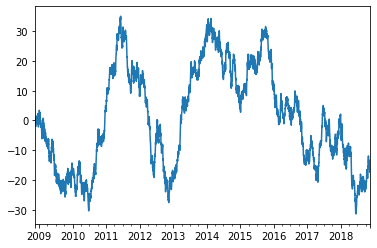

In [152]:
ts.plot()

In [153]:
ts["2014-01-01":"2016-01-01"] = np.NaN

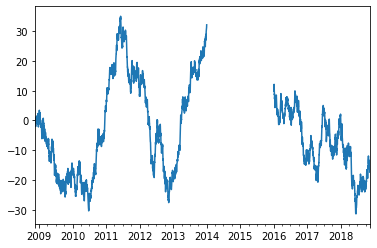

In [154]:
ts.plot()

## File operations

In [155]:
# CSV
# Writing to a csv file.

In [156]:
df.to_csv("testing.csv")

In [157]:
# Reading from csv


In [158]:
new_df = pd.read_csv("testing.csv")
new_df.head()

,Unnamed: 0,A,B,C,D,E,F,G,H
0,2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,42,0,NaN
1,2018-05-22,33.000000,-0.384622,-0.417984,0.051648,0.881834,42,1,NaN
2,2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,42,8,NaN
3,2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,42,27,NaN
4,2018-05-25,0.916471,0.405445,-0.022630,0.767971,42.000000,42,64,NaN


In [159]:
# Excel

In [160]:
df.to_excel('myx.xlsx', sheet_name='Sheet1')


In [161]:
df6=pd.read_excel('myx.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [162]:
df6.head()

,Unnamed: 0,A,B,C,D,E,F,G,H
0,2018-05-21,-0.334255,-0.425813,-0.664683,0.724464,1.988440,42,0,NaN
1,2018-05-22,33.000000,-0.384622,-0.417984,0.051648,0.881834,42,1,NaN
2,2018-05-23,0.299587,0.846127,0.013438,-0.703971,0.567783,42,8,NaN
3,2018-05-24,-1.051704,-1.014141,0.013082,-1.203426,-1.206114,42,27,NaN
4,2018-05-25,0.916471,0.405445,-0.022630,0.767971,42.000000,42,64,NaN


In [163]:
# basic DataFrame information:

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2018-05-21 to 2018-06-04
Freq: D
Data columns (total 8 columns):
A    15 non-null float64
B    15 non-null float64
C    15 non-null float64
D    15 non-null float64
E    15 non-null float64
F    15 non-null int64
G    15 non-null int64
H    0 non-null float64
dtypes: float64(6), int64(2)
memory usage: 1.7 KB


In [165]:
df.info(memory_usage="deep") # more reliable info

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2018-05-21 to 2018-06-04
Freq: D
Data columns (total 8 columns):
A    15 non-null float64
B    15 non-null float64
C    15 non-null float64
D    15 non-null float64
E    15 non-null float64
F    15 non-null int64
G    15 non-null int64
H    0 non-null float64
dtypes: float64(6), int64(2)
memory usage: 1.7 KB
